### Punto 1 procesamiento y gráficas en python

In [ ]:
import pandas as pd                  # Para manipulación de datos
import matplotlib.pyplot as plt      # Para visualización de datos
import numpy as np                   # Para operaciones numéricas
from datetime import datetime        # Para manejo de fechas
import seaborn as sns                # Para visualizaciones avanzadas
from scipy.stats import zscore       # Para estadísticas descriptivas
from sklearn.impute import SimpleImputer  # Para imputación de datos faltantes
from sklearn.preprocessing import StandardScaler  # Para estandarización
from sklearn.decomposition import PCA  # Para Análisis de Componentes Principales (PCA)
from sklearn.cluster import KMeans  # Para K-Means clustering


In [2]:
# Leer datos de clima
weather = pd.read_excel("WeatherData_1.xlsx", skiprows=1, 
                        names=["Date", "Rainfall depth (mm)", "Air temperature (°C)", 
                               "Air humidity (%)", "Windspeed (km/h)"])

# Leer datos de inflow
inflow = pd.read_excel("InflowData_1.xlsx", skiprows=1, 
                       names=["Date", "DMA A", "DMA B", "DMA C", "DMA D", "DMA E", 
                              "DMA F", "DMA G", "DMA H", "DMA I", "DMA J"])

# Convertir la columna 'Date' al formato datetime
weather['Date'] = pd.to_datetime(weather['Date'], format='%d/%m/%Y %H:%M')
inflow['Date'] = pd.to_datetime(inflow['Date'], format='%d/%m/%Y %H:%M')

# Unir los dataframes por la columna 'Date', manteniendo todas las filas de inflow
df_data = pd.merge(inflow, weather, on='Date', how='left')

# Eliminar filas duplicadas basadas en la columna 'Date', manteniendo la primera ocurrencia
df_data = df_data.drop_duplicates(subset=['Date'], keep='first')


In [3]:
# Reemplazar "#N/A" con NaN y convertir columnas a numérico
df_data.replace("#N/A", np.nan, inplace=True)
df_data.iloc[:, 1:] = df_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')



In [4]:
#Proporcion de datos faltantes
na_proportions = df_data.isna().mean().sort_values(ascending=False)
print(na_proportions)


DMA F                   0.137311
DMA I                   0.109966
DMA G                   0.107772
DMA H                   0.081231
DMA D                   0.066169
DMA J                   0.064122
DMA A                   0.055860
Air humidity (%)        0.054544
DMA E                   0.052936
DMA B                   0.042846
DMA C                   0.006727
Windspeed (km/h)        0.001170
Date                    0.000000
Rainfall depth (mm)     0.000000
Air temperature (°C)    0.000000
dtype: float64


In [5]:
# Creando una instancia de SimpleImputer con la estrategia 'mean' (media)
imputer = SimpleImputer(strategy='mean')

# Ajustando el imputer a los datos y transformándolos
df_data.iloc[:, 1:] = imputer.fit_transform(df_data.iloc[:, 1:])


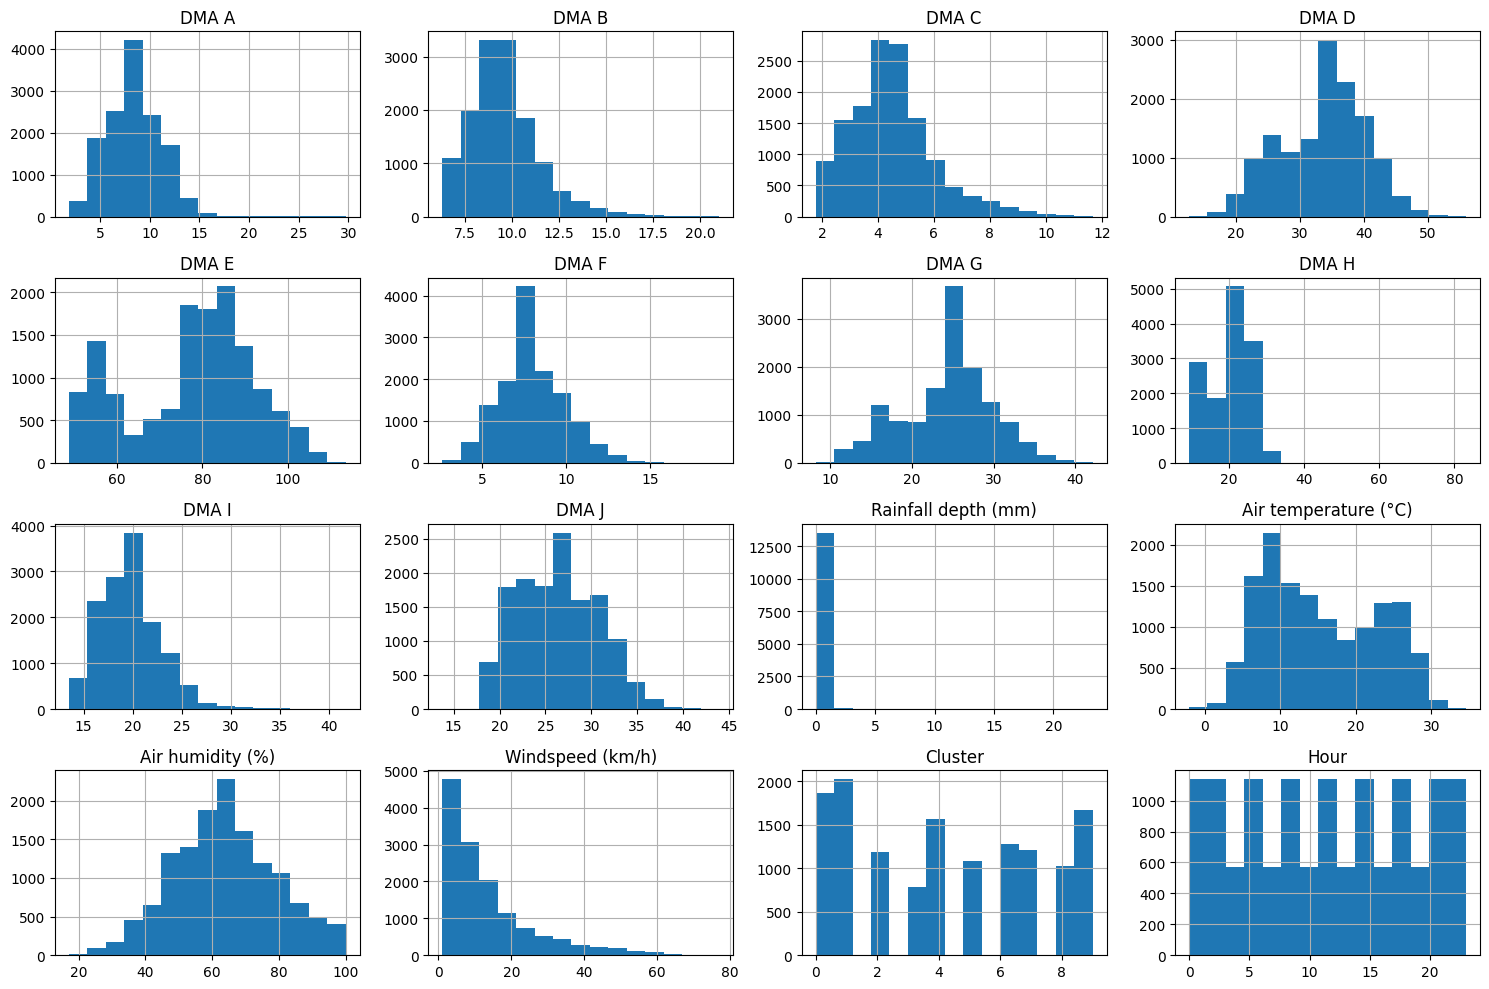

In [17]:
# Seleccionar las columnas numéricas del DataFrame y obtener sus nombres
numeric_cols = df_data.select_dtypes(include=np.number).columns

# Crear un histograma para las columnas numéricas
df_data[numeric_cols].hist(bins=15, figsize=(15, 10))

# Ajustar el diseño del gráfico y mostrarlo
plt.tight_layout()
plt.show()



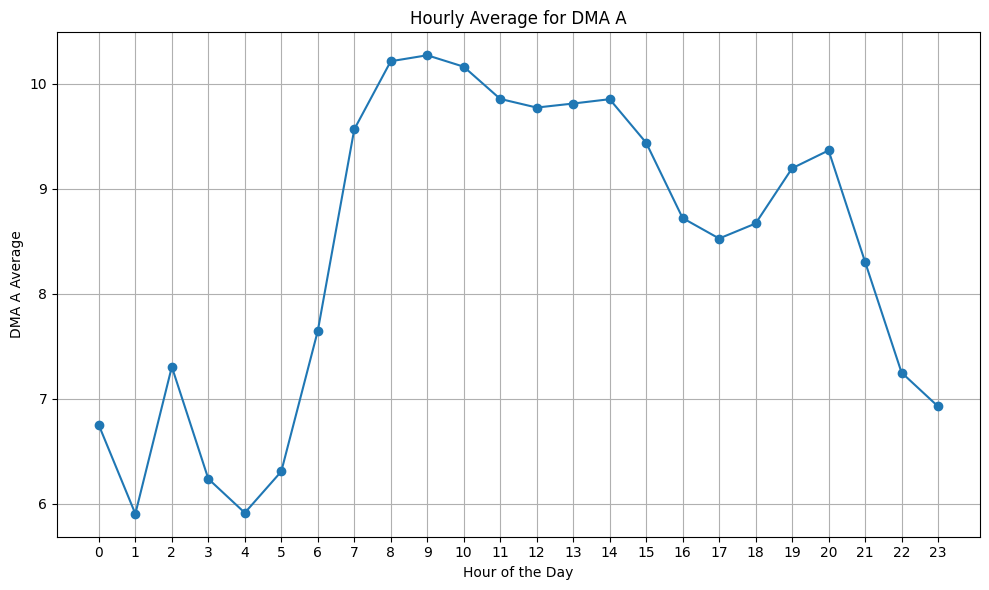

In [10]:
import pandas as pd  # Importar la librería pandas con el alias pd
import matplotlib.pyplot as plt  # Importar el módulo pyplot de la librería matplotlib con el alias plt

# Suponiendo que df_data es tu DataFrame de pandas

# Convertir la columna 'Date' a formato de fecha y hora
df_data['Date'] = pd.to_datetime(df_data['Date'], format="%d/%m/%Y %H:%M")

# Extraer la hora del día
df_data['Hour'] = df_data['Date'].dt.hour

# Agrupar por hora para calcular el promedio horario de DMA A
hourly_averages = df_data.groupby('Hour')['DMA A'].mean().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(10, 6)) 
plt.plot(hourly_averages['Hour'], hourly_averages['DMA A'], marker='o', linestyle='-')  # Graficar el promedio horario de DMA A
plt.title('Promedio Horario para DMA A')  
plt.xticks(range(24))  
plt.tight_layout() o
plt.show()  #


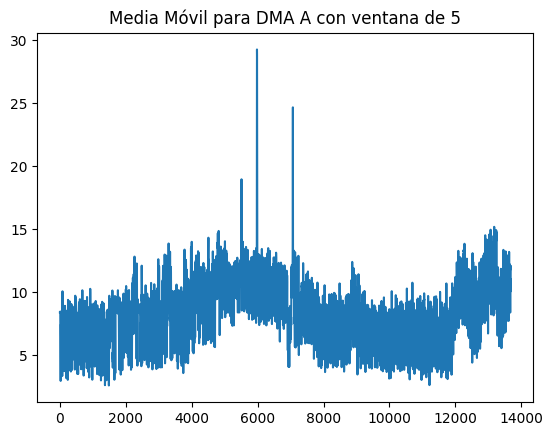

In [7]:
# Ejemplo de cálculo de media móvil para la columna 'DMA A'
df_data['DMA A'].rolling(window=5).mean().plot()
plt.title('Media Móvil para DMA A con ventana de 5')
plt.show()


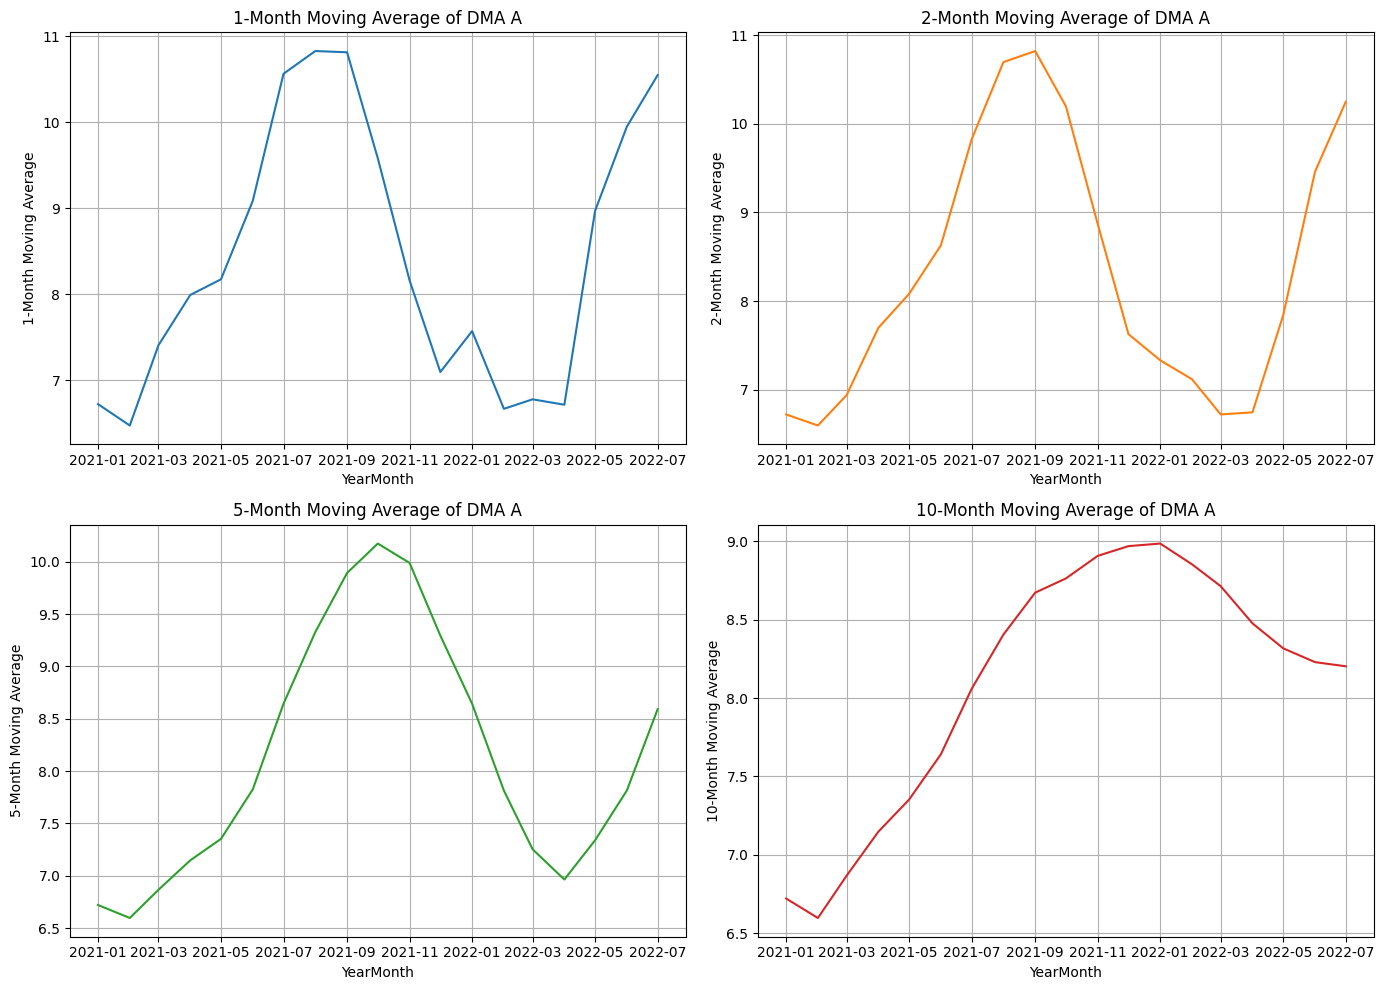

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from matplotlib.gridspec import GridSpec

#Este código realiza el cálculo de medias móviles de diferentes periodos para la columna 'DMA A' de un DataFrame, y luego crea subgráficos para visualizar estas medias móviles a lo largo del tiempo.

df_data_1=df_data.copy()

df_data_1['Date'] = pd.to_datetime(df_data_1['Date'])

df_data_1['YearMonth'] = df_data_1['Date'].dt.to_period('M')

monthly_avg = df_data_1.groupby('YearMonth')['DMA A'].mean().reset_index()

moving_avg_periods = [1, 2, 5, 10]
for period in moving_avg_periods:
    monthly_avg[f'MA_{period}'] = monthly_avg['DMA A'].rolling(window=period, min_periods=1).mean()

monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig)

for i, period in enumerate(moving_avg_periods):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.plot(monthly_avg['YearMonth'], monthly_avg[f'MA_{period}'], color='C{}'.format(i))
    ax.set_title('{}-Month Moving Average of DMA A'.format(period))
    ax.set_xlabel('YearMonth')
    ax.set_ylabel('{}-Month Moving Average'.format(period))
    ax.grid(True)

plt.tight_layout()
plt.show()


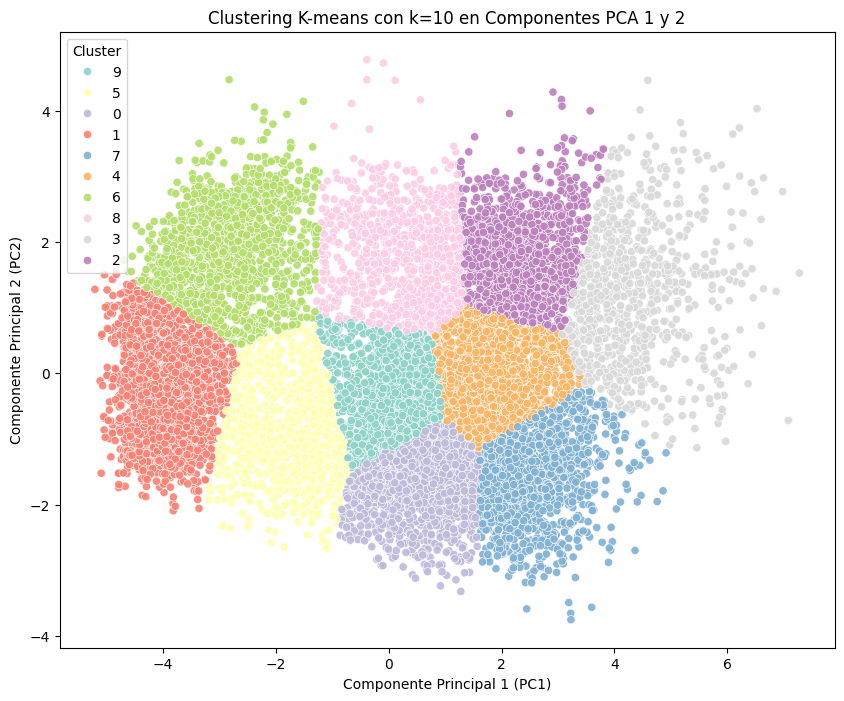

In [18]:
# Importar las librerías necesarias
from sklearn.decomposition import PCA  # Importar PCA de scikit-learn
from sklearn.cluster import KMeans  # Importar KMeans de scikit-learn
import matplotlib.pyplot as plt  # Importar matplotlib para visualización
import seaborn as sns  # Importar seaborn para visualización
import pandas as pd  # Importar pandas para manipulación de datos

# Suponiendo que scaled_df es tu DataFrame escalado

# Realizar el análisis de componentes principales (PCA) con 2 componentes
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_df)

# Convertir los resultados de PCA a un DataFrame
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])

# Realizar clustering K-Means
k = 10  # Número de clústeres
km_res = KMeans(n_clusters=k, n_init=25, random_state=42).fit(pca_df[['PC1', 'PC2']])

# Agregar las asignaciones de clúster al DataFrame
pca_df['cluster'] = km_res.labels_.astype(str)  # Convertir etiquetas de clúster a string para la codificación de colores

# Visualización con matplotlib y seaborn
plt.figure(figsize=(10, 8))  # Crear una figura
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set3', data=pca_df, alpha=0.9)  # Scatter plot con seaborn
plt.title('Clustering K-means con k=10 en Componentes PCA 1 y 2')  # Título del gráfico
plt.xlabel('Componente Principal 1 (PC1)')  # Etiqueta del eje x
plt.ylabel('Componente Principal 2 (PC2)')  # Etiqueta del eje y
plt.legend(title='Cluster')  # Mostrar leyenda con título de "Cluster"
plt.show()  # Mostrar el gráfico



## Outliers

In [19]:
import pandas as pd  # Importar la librería pandas
import numpy as np  # Importar la librería numpy

# Calcular los centroides a partir del resultado de kmeans
centroids = pca_df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()

# Unir los centroides de nuevo a los datos originales para calcular las distancias
pca_df_with_centroids = pd.merge(pca_df, centroids, on='cluster', suffixes=('', '_centroid'))

# Calcular la distancia euclidiana desde cada punto hasta su centroide de clúster
pca_df_with_centroids['distance'] = np.sqrt((pca_df_with_centroids['PC1'] - pca_df_with_centroids['PC1_centroid'])**2 + 
                                            (pca_df_with_centroids['PC2'] - pca_df_with_centroids['PC2_centroid'])**2)

# Definir el criterio para detectar valores atípicos
pca_df_with_centroids['mean_distance'] = pca_df_with_centroids.groupby('cluster')['distance'].transform('mean')
pca_df_with_centroids['sd_distance'] = pca_df_with_centroids.groupby('cluster')['distance'].transform('std')

# Marcar los valores atípicos
pca_df_with_centroids['outlier'] = pca_df_with_centroids['distance'] > (pca_df_with_centroids['mean_distance'] + 1.5 * pca_df_with_centroids['sd_distance'])

# Filtrar los valores atípicos
df_no_outliers = pca_df_with_centroids[pca_df_with_centroids['outlier'] == False].copy()


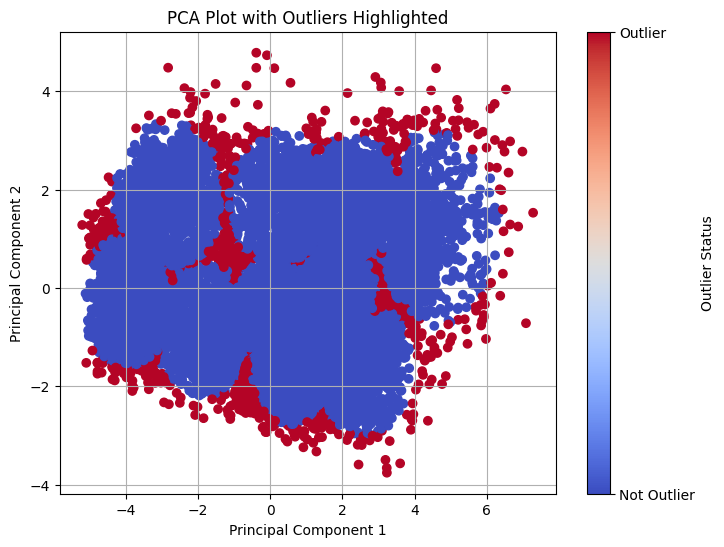

In [15]:
import matplotlib.pyplot as plt

# Grafica PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_with_centroids['PC1'], pca_df_with_centroids['PC2'], c=pca_df_with_centroids['outlier'], cmap='coolwarm')
plt.colorbar(label='Outlier Status', ticks=[0, 1], format=plt.FuncFormatter(lambda val, loc: ['Not Outlier', 'Outlier'][int(val)]))
plt.title('PCA Plot with Outliers Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [16]:
pip install nbmerge

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6428 sha256=1258c24a765877a49548f0e154163940877448b2c21c1108507ae044c260fcf6
  Stored in directory: c:\users\david\appdata\local\pip\cache\wheels\05\7d\2c\44d9b357515a0b4f972f5438115face603f69e8c70233ddc1a
Successfully built nbmerge
Note: you may need to restart the kernel to use updated packages.


# 2 punto procesamiento y gráficas en python

In [6]:
import pandas as pd

canciones = pd.read_csv('canciones.csv', encoding='ISO-8859-1')
canciones.head(3)

,id,name,album_id,album,duration,tempo,valence,danceability,energy,acousticness,instrumentalness,liveness,speechiness
0,02jXZfT8IjNmdrKbnHBq1J,Islamabad,1khQHoHWfemMaJpmxCMaqJ,Zona Temporalmente Autónoma,423.4,117.6,12.8,36.4,51.6,33.9,28.7,10.5,3.5
1,0e8EpWgw3MmmY1641BiFWG,La Maquina de Escribir,4qNag8cUD12cazCepgfZ6O,Pop,343.0,132.6,53.0,25.5,93.0,0.1,2.5,18.8,7.6
2,0eOEe1eGVaxNhLFDrQqp5H,Corrientes Circulares En El Tiempo,2yr7ln77nOyA7RzE6T4X4I,Encuentros con entidades,278.1,122.8,54.7,52.3,78.3,0.1,82.1,12.7,3.0


In [7]:
print(canciones.shape)  # Imprime las dimensiones del DataFrame

print(canciones.describe())  # Resumen estadístico de las columnas numéricas

print(canciones.describe(include=['O']))  # Resumen de las columnas no numéricas

(109, 13)
         duration       tempo     valence  danceability      energy  \
count  109.000000  109.000000  109.000000    109.000000  109.000000   
mean   267.121101  127.805505   49.875229     33.431193   72.759633   
std    104.003710   29.412824   25.252140     13.240557   17.554044   
min     88.400000   59.700000    4.700000      6.800000   21.900000   
25%    203.800000  107.600000   27.900000     24.500000   62.900000   
50%    243.700000  122.800000   50.100000     34.400000   76.600000   
75%    296.500000  143.300000   70.100000     41.700000   86.500000   
max    621.700000  215.100000   96.700000     75.000000   97.200000   

       acousticness  instrumentalness    liveness  speechiness  
count    109.000000        109.000000  109.000000   109.000000  
mean       6.266972         37.133028   23.322018     4.227523  
std       13.309542         36.000394   18.049137     1.439706  
min        0.000000          0.000000    4.900000     2.700000  
25%        0.000000      

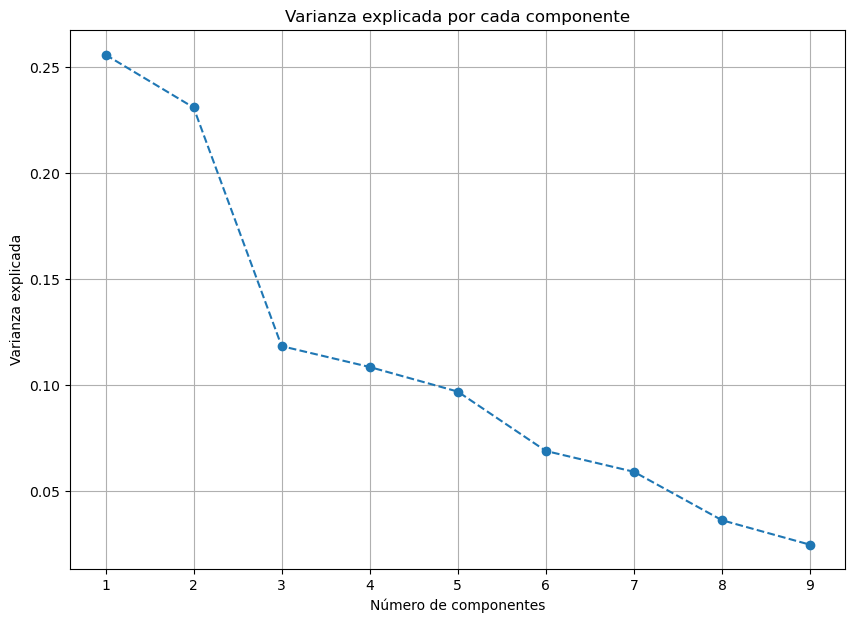

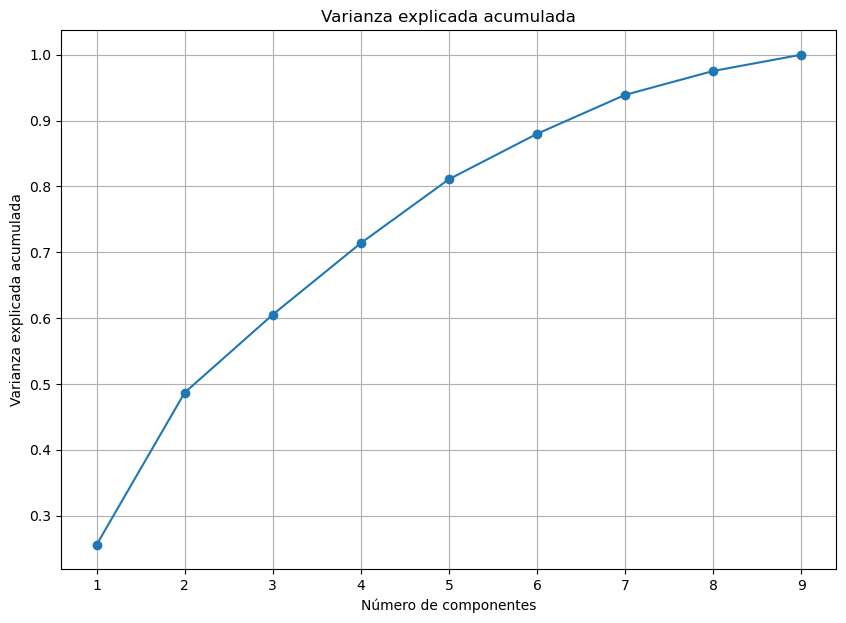

                       PC1       PC2       PC3       PC4       PC5       PC6  \
duration          0.225795  0.435955 -0.378226 -0.127626  0.082838  0.429336   
tempo            -0.304815  0.301552 -0.138229  0.137843 -0.629198  0.467283   
valence          -0.361602 -0.440018  0.080213 -0.262290 -0.300302  0.051540   
danceability      0.058403 -0.574158 -0.086205 -0.173893 -0.160941  0.295515   
energy           -0.584937  0.086079 -0.115267 -0.155145  0.093872 -0.041126   
acousticness      0.429738 -0.145056  0.157624  0.471193 -0.461864 -0.025056   
instrumentalness  0.214605  0.282726  0.027110 -0.608880 -0.486495 -0.490410   
liveness          0.070966  0.168816  0.825431 -0.280661  0.104126  0.427544   
speechiness      -0.379501  0.242596  0.322133  0.412405 -0.107303 -0.285862   

                       PC7       PC8       PC9  
duration          0.572212  0.247168 -0.141093  
tempo            -0.338174 -0.221664 -0.017501  
valence           0.149686  0.459543 -0.523426  
dan

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Seleccionar variables numéricas para el análisis PCA
datos_pca = canciones[["duration", "tempo", "valence", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]]

# Escalar las variables para igualar su varianza
scaler = StandardScaler()
datos_pca_scaled = scaler.fit_transform(datos_pca)

# Ejecutar PCA
pca = PCA()
pca_result = pca.fit_transform(datos_pca_scaled)

# Visualizar los eigenvalores para evaluar la cantidad de componentes principales a retener
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Varianza explicada por cada componente")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Mostrar la varianza explicada acumulada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Extraer y mostrar las cargas (loadings) de las variables y su contribución al PCA
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(datos_pca.columns))], index=datos_pca.columns)
print(loadings)


## PCA con 4 componentes

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Seleccionar variables numéricas para el análisis PCA
datos_pca = canciones[["duration", "tempo", "valence", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]]

# Escalar las variables para igualar su varianza
scaler = StandardScaler()
datos_pca_scaled = scaler.fit_transform(datos_pca)

# Ejecutar PCA, limitando a los primeros 4 componentes principales
pca = PCA(n_components=4)
pca_result = pca.fit_transform(datos_pca_scaled)

# pca_result ahora contiene las proyecciones de los datos originales en el espacio de los primeros 4 componentes principales

# la varianza explicada por estos 4 componentes
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.cumsum())

# Y para obtener las cargas (loadings) de cada variable en los 4 componentes
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(4)], index=datos_pca.columns)
print(loadings)


Varianza explicada por cada componente: [0.25590888 0.23100918 0.11842003 0.10857313]
Varianza explicada acumulada: [0.25590888 0.48691806 0.60533809 0.71391122]
                       PC1       PC2       PC3       PC4
duration          0.225795  0.435955 -0.378226 -0.127626
tempo            -0.304815  0.301552 -0.138229  0.137843
valence          -0.361602 -0.440018  0.080213 -0.262290
danceability      0.058403 -0.574158 -0.086205 -0.173893
energy           -0.584937  0.086079 -0.115267 -0.155145
acousticness      0.429738 -0.145056  0.157624  0.471193
instrumentalness  0.214605  0.282726  0.027110 -0.608880
liveness          0.070966  0.168816  0.825431 -0.280661
speechiness      -0.379501  0.242596  0.322133  0.412405


## Circulos de correlación para cada combinación de ejes:

In [22]:
loadings

,PC1,PC2,PC3,PC4
duration,0.225795,0.435955,-0.378226,-0.127626
tempo,-0.304815,0.301552,-0.138229,0.137843
valence,-0.361602,-0.440018,0.080213,-0.262290
danceability,0.058403,-0.574158,-0.086205,-0.173893
energy,-0.584937,0.086079,-0.115267,-0.155145
acousticness,0.429738,-0.145056,0.157624,0.471193
instrumentalness,0.214605,0.282726,0.027110,-0.608880
liveness,0.070966,0.168816,0.825431,-0.280661
speechiness,-0.379501,0.242596,0.322133,0.412405


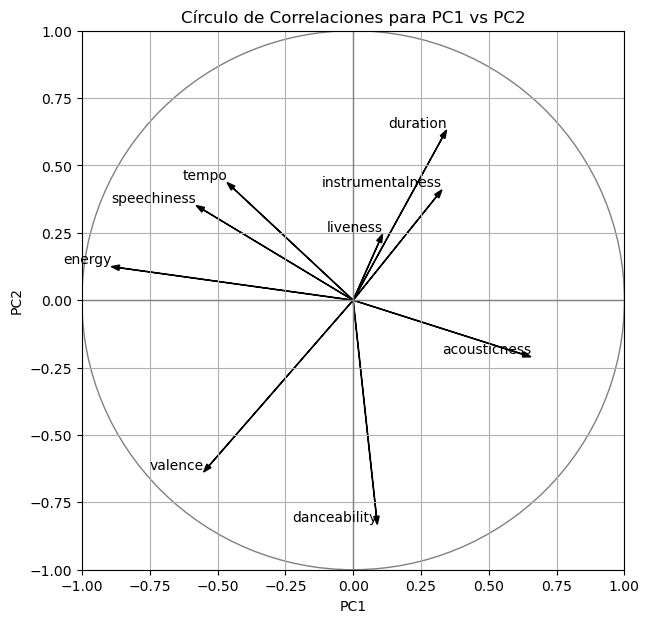

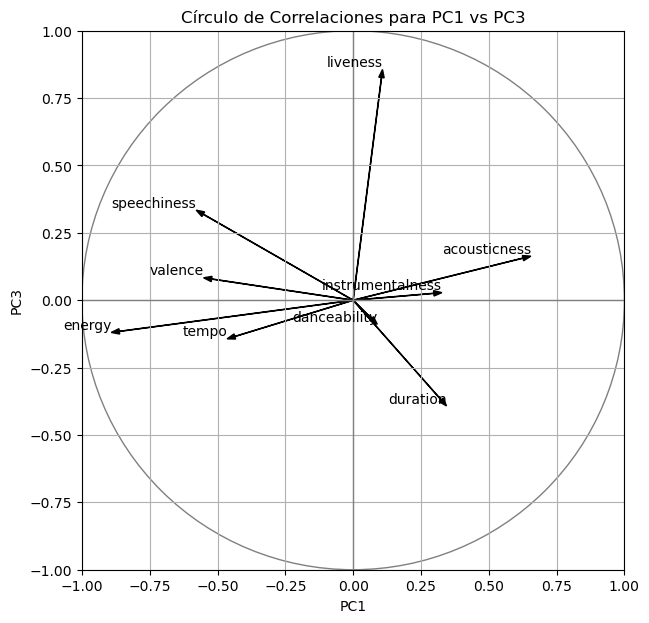

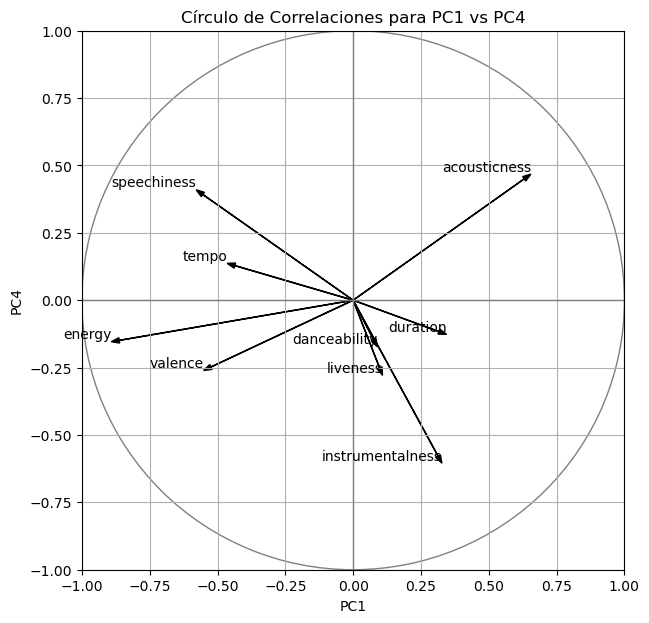

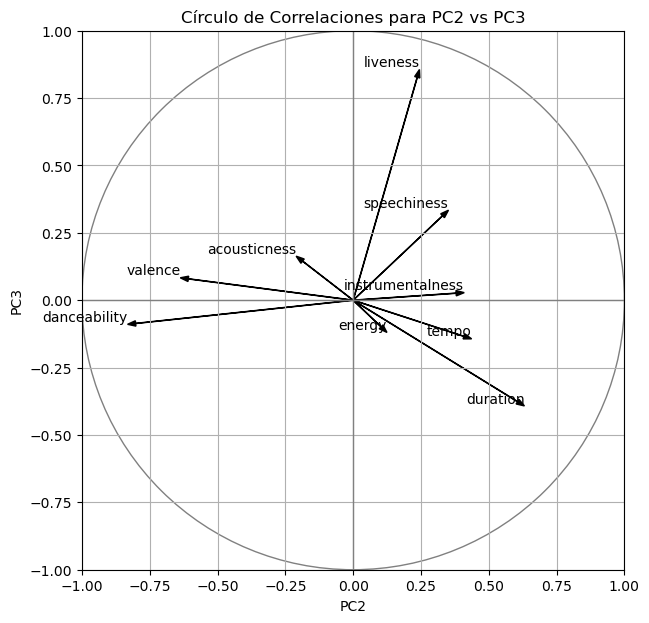

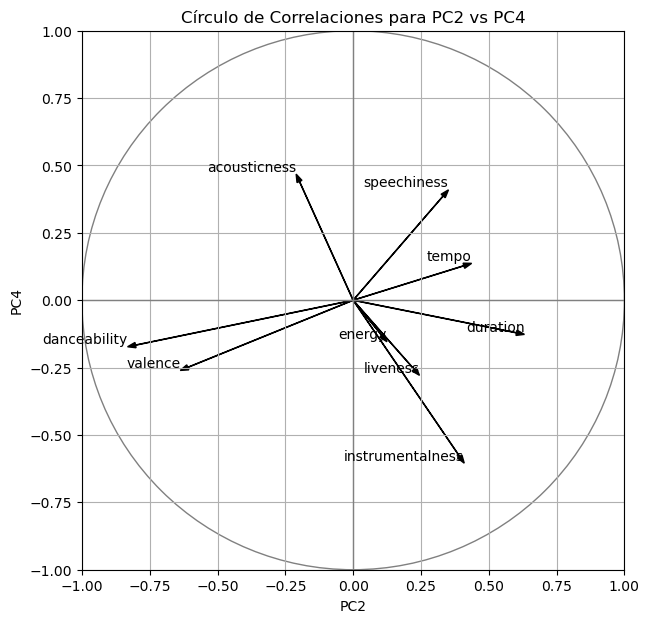

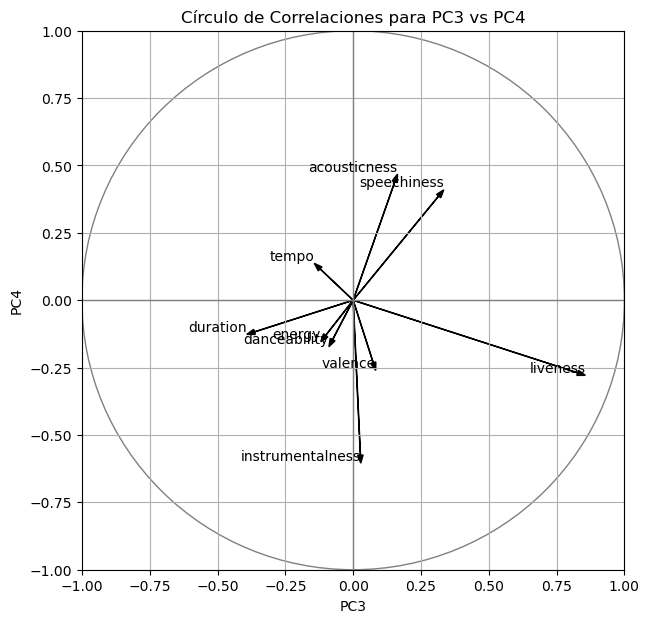

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import combinations


# Calculamos los loadings para las componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Nombres de las variables
variables_names = ["duration", "tempo", "valence", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]

# Generamos las combinaciones de los 4 primeros ejes
for (i, j) in combinations(range(4), 2):
    plt.figure(figsize=(7, 7))
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    ax = plt.gca()
    ax.add_artist(circle)

    # Añadimos las flechas para cada variable
    for k in range(loadings.shape[0]):
        plt.arrow(0, 0, loadings[k, i], loadings[k, j], head_width=0.02, head_length=0.03, length_includes_head=True, color='black')
        plt.text(loadings[k, i], loadings[k, j], variables_names[k], ha='right', va='bottom')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{j+1}')
    plt.title(f'Círculo de Correlaciones para PC{i+1} vs PC{j+1}')
    plt.grid(True)
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.show()


## Codigo para nubes de individuos

In [37]:
pca_df['Álbum'] = canciones.iloc[:, 3].values
pca_df.head()

,PC1,PC2,PC3,PC4,Álbum
0,2.689798,0.355713,-0.951157,1.411897,Zona Temporalmente Autónoma
1,-1.960470,1.082127,0.079213,1.231631,Pop
2,0.257159,-0.769796,-0.964341,-1.556292,Encuentros con entidades
3,-0.446109,-0.443866,-0.171707,0.875053,La Leyenda Del Espacio
4,-1.367764,-1.405818,-0.897915,0.390632,Pop


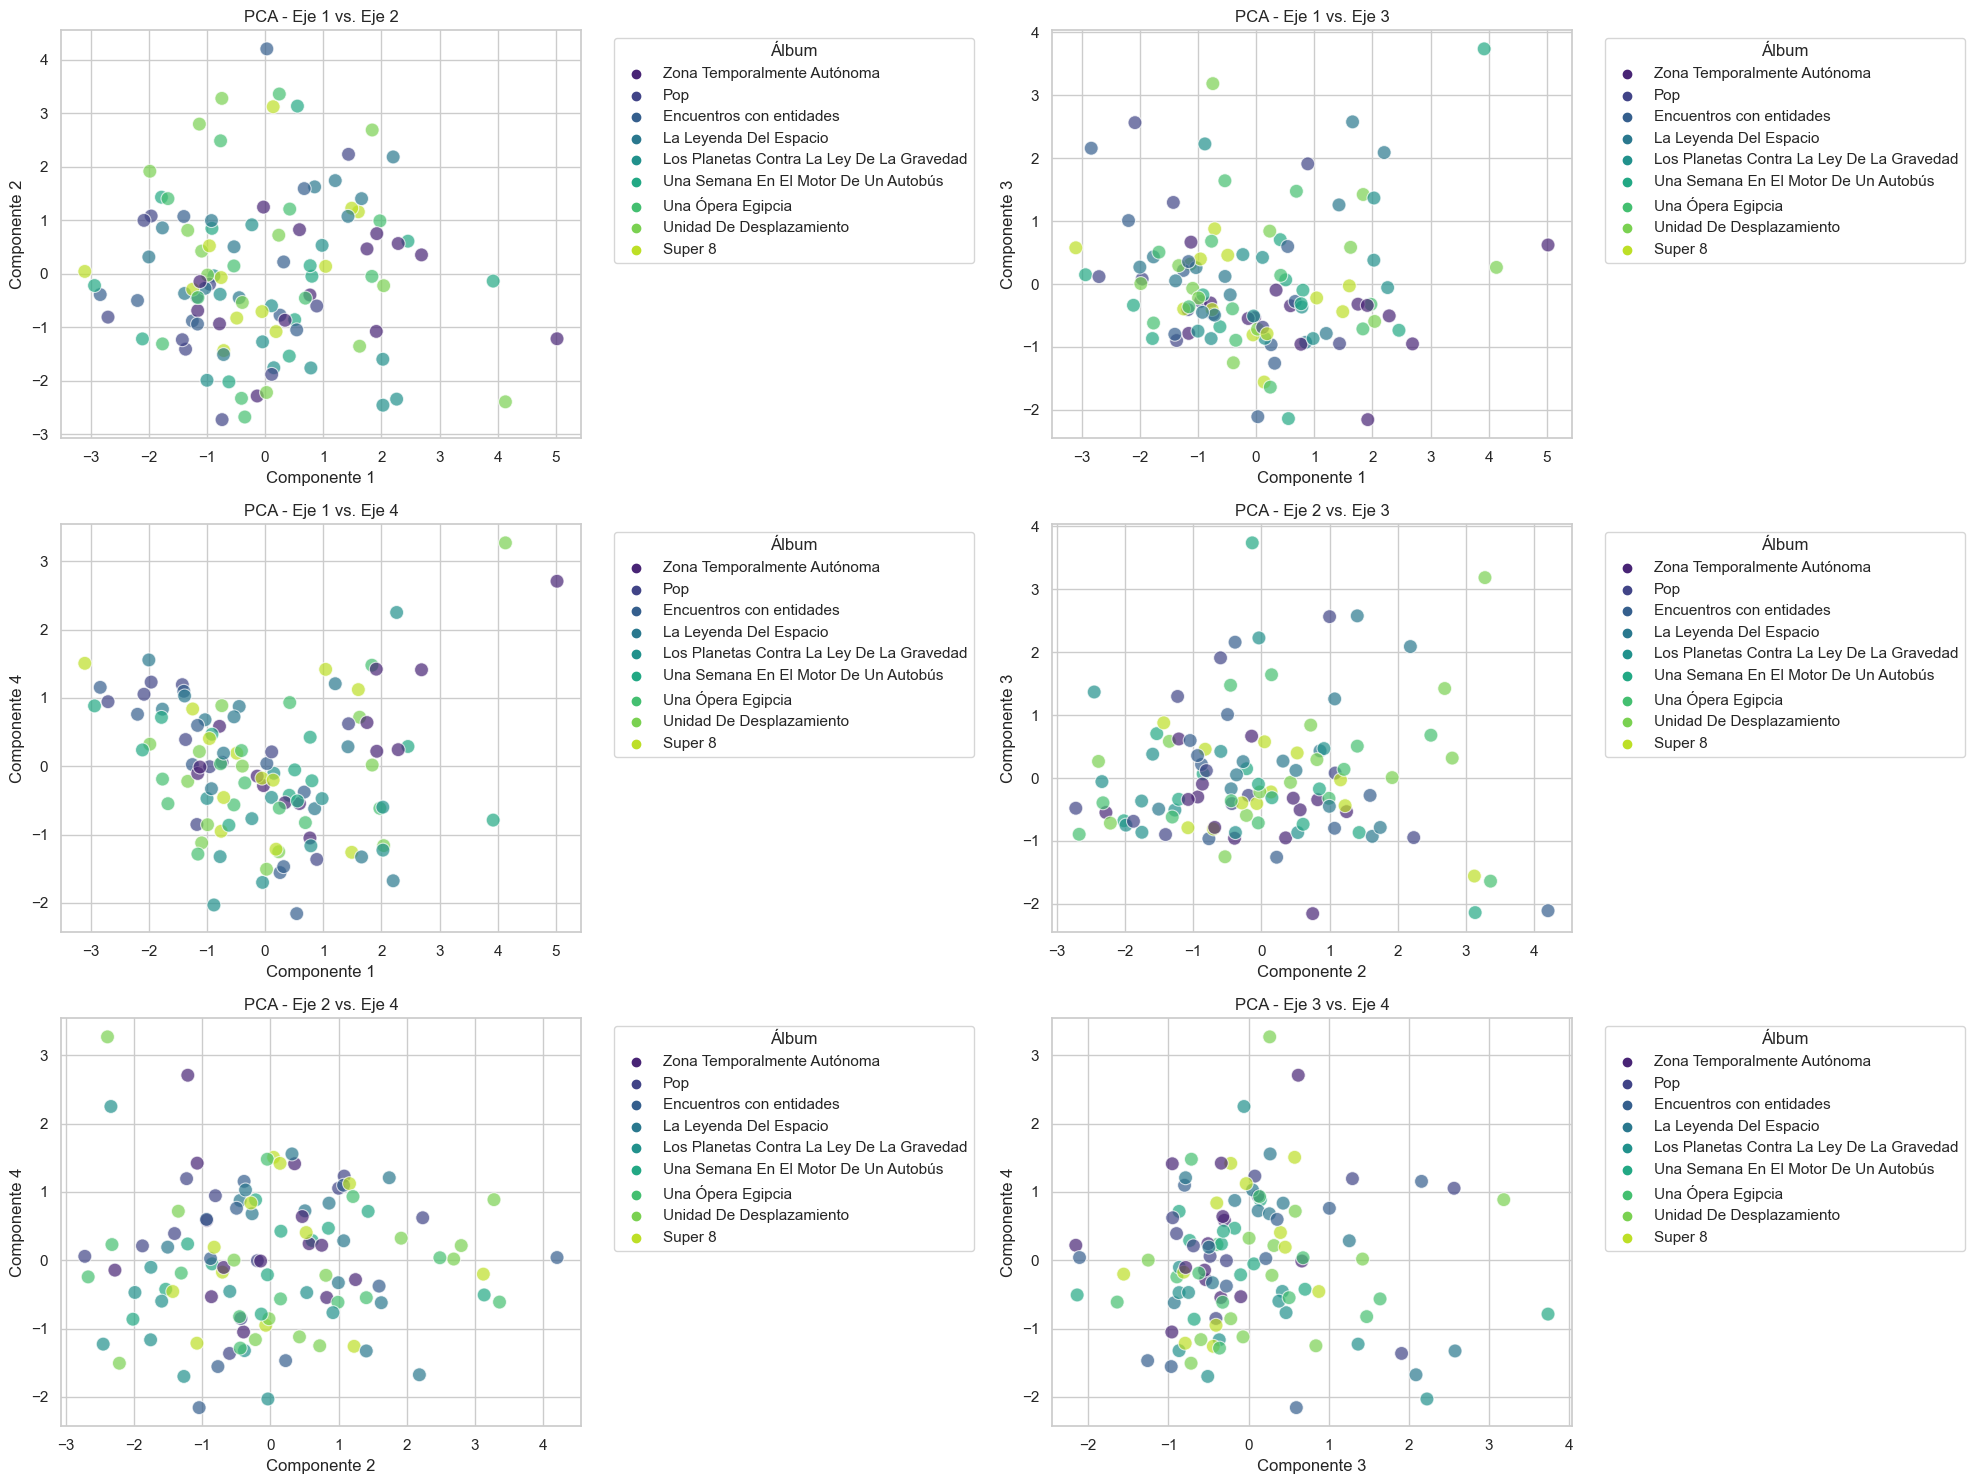

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Suponiendo que canciones es tu DataFrame original y pca_result viene de aplicar PCA sobre datos_pca_scaled
# Convertir pca_result en un DataFrame para facilitar la visualización
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Asumimos que la primera columna de canciones contiene los nombres de los álbumes
# Añadir la columna de álbumes al DataFrame del PCA
pca_df['Álbum'] = canciones.iloc[:, 3].values

# Configuración de seaborn para los gráficos
sns.set(style="whitegrid")

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta según tus necesidades
axes = axes.flatten()  # Aplana el array de ejes para facilitar su acceso

# Generar y mostrar gráficos de PCA para todas las combinaciones de los primeros 4 ejes
for count, (i, j) in enumerate(combinations(range(1, 5), 2)):
    ax = axes[count]
    sns.scatterplot(data=pca_df, x=f'PC{i}', y=f'PC{j}', hue='Álbum', palette='viridis', ax=ax, s=100, alpha=0.7)
    ax.set_title(f'PCA - Eje {i} vs. Eje {j}')
    ax.set_xlabel(f'Componente {i}')
    ax.set_ylabel(f'Componente {j}')
    # Colocar la leyenda fuera del gráfico
    ax.legend(title='Álbum', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para evitar la superposición y asegurar que la leyenda sea visible
plt.tight_layout()
plt.show()



## Resumen cosenos por variable

In [40]:
# Seleccionar variables numéricas para el análisis PCA
datos_pca = canciones[["duration", "tempo", "valence", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]]

# Escalar las variables para igualar su varianza
scaler = StandardScaler()
datos_pca_scaled = scaler.fit_transform(datos_pca)

# Ejecutar PCA, limitando a los primeros 4 componentes principales
pca = PCA(n_components=4)
pca_result = pca.fit_transform(datos_pca_scaled)

# pca_result ahora contiene las proyecciones de los datos originales en el espacio de los primeros 4 componentes principales

# la varianza explicada por estos 4 componentes
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.cumsum())

# Y para obtener las cargas (loadings) de cada variable en los 4 componentes
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(4)], index=datos_pca.columns)
print(loadings)

Varianza explicada por cada componente: [0.25590888 0.23100918 0.11842003 0.10857313]
Varianza explicada acumulada: [0.25590888 0.48691806 0.60533809 0.71391122]
                       PC1       PC2       PC3       PC4
duration          0.225795  0.435955 -0.378226 -0.127626
tempo            -0.304815  0.301552 -0.138229  0.137843
valence          -0.361602 -0.440018  0.080213 -0.262290
danceability      0.058403 -0.574158 -0.086205 -0.173893
energy           -0.584937  0.086079 -0.115267 -0.155145
acousticness      0.429738 -0.145056  0.157624  0.471193
instrumentalness  0.214605  0.282726  0.027110 -0.608880
liveness          0.070966  0.168816  0.825431 -0.280661
speechiness      -0.379501  0.242596  0.322133  0.412405


In [41]:
cos2 = loadings**2
cos2_df = pd.DataFrame(cos2, columns=[f'PC{i+1}' for i in range(cos2.shape[1])], index=canciones.columns[3:])

# Mostramos la estructura de 'cos2_df' que contiene los cos2 de cada variable
print(cos2_df)

# Mostramos los primeros valores de 'cos2_df' para evaluar la calidad de representación de cada variable
print(cos2_df.head())

                       PC1       PC2       PC3       PC4
album                  NaN       NaN       NaN       NaN
duration          0.050983  0.190057  0.143055  0.016288
tempo             0.092912  0.090934  0.019107  0.019001
valence           0.130756  0.193616  0.006434  0.068796
danceability      0.003411  0.329658  0.007431  0.030239
energy            0.342151  0.007410  0.013286  0.024070
acousticness      0.184674  0.021041  0.024845  0.222023
instrumentalness  0.046055  0.079934  0.000735  0.370735
liveness          0.005036  0.028499  0.681336  0.078770
speechiness       0.144021  0.058853  0.103769  0.170078
                   PC1       PC2       PC3       PC4
album              NaN       NaN       NaN       NaN
duration      0.050983  0.190057  0.143055  0.016288
tempo         0.092912  0.090934  0.019107  0.019001
valence       0.130756  0.193616  0.006434  0.068796
danceability  0.003411  0.329658  0.007431  0.030239


In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
# Cargar los datos
data_PCA_ExpertWine = pd.read_csv("data_PCA_ExpertWine.csv", sep=";")
data_PCA_ExpertWine['Label'] = data_PCA_ExpertWine['Label'].astype('category')
print(data_PCA_ExpertWine['Label'].value_counts())
# Establecer la columna 'id' como el índice
data_PCA_ExpertWine.set_index('  ', inplace=True)
data_PCA_ExpertWine

Label
Sauvignon    5
Vouvray      5
Name: count, dtype: int64


,Label,O.fruity,O.passion,O.citrus,O.Intensity.before.shaking,O.Intensity.after.shaking,Expression,O.candied.fruit,O.vanilla,O.wooded,...,Attack.intensity,Sweetness,Acidity,Bitterness,Astringency,Aroma.intensity,Aroma.persistency,Visual.intensity,Odor.preference,Overall.preference
,,,,,,,,,,,,,,,,,,,,,
S Michaud,Sauvignon,4.250000,2.428571,5.714286,7.750000,8.000,7.142857,0.666667,0.500000,0.333333,...,6.000000,3.500000,5.875000,4.125,1.428571,7.142857,6.714286,5.000,6.000000,5.000000
S Renaudie,Sauvignon,4.428571,3.142857,5.250000,7.125000,7.625,7.000000,0.666667,0.500000,0.333333,...,6.428571,3.285714,6.750000,3.750,2.333333,7.166667,6.571429,3.375,5.400000,5.500000
S Trotignon,Sauvignon,5.142857,4.000000,5.250000,7.125000,7.375,7.142857,1.000000,0.500000,0.333333,...,6.571429,3.000000,6.125000,4.125,2.375000,6.142857,6.142857,3.000,5.000000,5.500000
S Buisse Domaine,Sauvignon,4.250000,2.428571,3.571429,5.500000,6.250,5.428571,1.500000,0.666667,0.500000,...,5.142857,3.875000,5.625000,2.500,3.000000,4.857143,5.142857,4.125,5.285714,4.625000
S Buisse Cristal,Sauvignon,5.625000,3.142857,3.500000,6.000000,6.500,6.166667,3.000000,1.142857,0.857143,...,5.571429,3.375000,6.625000,5.000,3.125000,6.142857,5.142857,3.625,6.142857,5.000000
V Aub Silex,Vouvray,3.857143,0.666667,3.285714,3.857143,4.250,4.428571,2.857143,0.833333,1.000000,...,5.142857,7.875000,4.375000,3.000,2.375000,5.857143,5.571429,4.000,5.000000,5.500000
V Aub Marigny,Vouvray,2.142857,0.666667,1.000000,7.750000,8.000,6.000000,3.333333,5.666667,7.750000,...,6.428571,3.500000,6.375000,5.000,4.000000,6.333333,6.666667,6.000,5.142857,4.125000
V Font Domaine,Vouvray,5.142857,0.500000,2.500000,6.250000,6.750,6.000000,4.500000,1.833333,1.000000,...,5.428571,3.000000,5.714286,4.000,2.500000,6.666667,6.333333,6.375,4.400000,5.125000
V Font Brules,Vouvray,5.142857,0.833333,3.833333,6.750000,7.500,6.714286,4.714286,1.833333,2.000000,...,5.571429,3.875000,5.375000,4.000,3.125000,7.000000,6.142857,7.375,4.400000,6.428571


### 1. Filtrado de importancia de variables:

In [17]:
# Ajustar el modelo LDA
X = data_PCA_ExpertWine.drop(columns=['Label'])
y = data_PCA_ExpertWine['Label']
lda_model = LDA().fit(X, y)

# Obtener las características más importantes
important_features = lda_model.scalings_

# Obtener los coeficientes de discriminación
discrimination_coef = pd.DataFrame(abs(lda_model.scalings_), index=X.columns)

# Ordenar los coeficientes de discriminación
discrimination_coef_sorted = discrimination_coef.apply(lambda col: col.sort_values(ascending=False), axis=0)

# Seleccionar las mejores características
best_features = discrimination_coef_sorted[discrimination_coef_sorted[0] >= 0.2]

# Mostrar las mejores características seleccionadas
print(best_features)

                        0
Freshness        1.260430
Odor.preference  0.400481
O.passion        0.375383
O.mushroom       0.367042


### 2. Wrapper Methods (Métodos de envoltura):

In [23]:
# Definir el problema de clasificación
X = data_PCA_ExpertWine.drop(columns=['Label'])
y = data_PCA_ExpertWine['Label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Realizar Sequential Forward Selection con el modelo SVM
rfe_selector = RFE(estimator=svm_model, n_features_to_select=1, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train)

# Mostrar las características seleccionadas
print(list(X.columns[rfe_selector.support_]))

['O.passion']


### 3. Embedded Methods (Métodos incrustados):

In [24]:
# Crear un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Mostrar la importancia de las características según el modelo Random Forest
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

O.flower                      0.105499
O.passion                     0.101010
O.citrus                      0.084848
O.wooded                      0.080808
O.plante                      0.070707
O.alcohol                     0.066057
Freshness                     0.062049
Oxidation                     0.050505
O.vanilla                     0.046304
Grade                         0.040404
Typicity                      0.040404
O.fruity                      0.036364
O.mushroom                    0.030303
Aroma.persistency             0.030303
O.candied.fruit               0.030303
Smoothness                    0.028732
Expression                    0.020202
Visual.intensity              0.020202
Acidity                       0.020202
Odor.preference               0.014590
Bitterness                    0.014590
Surface.feeling               0.005612
Aroma.intensity               0.000000
Sweetness                     0.000000
Astringency                   0.000000
Attack.intensity         